In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.simplefilter("ignore")

# Data Preparation

**Inspect data**

In [27]:
data = pd.read_csv('country_vaccinations.csv')
data.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [28]:
data = pd.read_csv('country_vaccinations.csv')
data.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [29]:
data.columns

Index(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'source_website'],
      dtype='object')

**Keep only useful columns**

In [30]:
relevant_columns = [
    'country',
    'iso_code',
    'date',
    'daily_vaccinations',
    'people_vaccinated',
    'people_vaccinated_per_hundred',
    'people_fully_vaccinated',
    'vaccines',
]

data = data[relevant_columns]
data.columns

Index(['country', 'iso_code', 'date', 'daily_vaccinations',
       'people_vaccinated', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated', 'vaccines'],
      dtype='object')

**Check datatypes**

In [31]:
data.dtypes

country                           object
iso_code                          object
date                              object
daily_vaccinations               float64
people_vaccinated                float64
people_vaccinated_per_hundred    float64
people_fully_vaccinated          float64
vaccines                          object
dtype: object

**Inspect missing values**

In [32]:
data.isnull().sum()

country                              0
iso_code                             0
date                                 0
daily_vaccinations                 243
people_vaccinated                14761
people_vaccinated_per_hundred    14761
people_fully_vaccinated          17506
vaccines                             0
dtype: int64

Check if `people_vaccinated` and `people_vaccinated_per_hundred` line up in terms of missing values

In [33]:
data.loc[data.people_vaccinated.isnull() | data.people_vaccinated_per_hundred.isnull()].shape[0]

14761

Yes

Check which countries and dates have missing data

In [34]:
data.loc[data.people_vaccinated.isnull(), 'country'].value_counts()

China                   214
Kuwait                  183
Monaco                  183
United Arab Emirates    178
Saudi Arabia            172
                       ... 
Romania                   3
Denmark                   2
England                   2
Malta                     1
Scotland                  1
Name: country, Length: 195, dtype: int64

In [35]:
data.loc[data.people_vaccinated.isnull(), 'date'].value_counts()

2021-06-26    119
2021-06-19    119
2021-05-15    117
2021-06-04    117
2021-05-13    114
             ... 
2020-12-07      1
2020-12-06      1
2020-12-13      1
2020-12-12      1
2020-12-09      1
Name: date, Length: 225, dtype: int64

In [36]:
data.country.nunique()

219

Almost every country has some missing data as expected, but all the categorical features are present.

Check what proportion of data is missing.

In [37]:
pct = data.loc[data.people_vaccinated_per_hundred.isnull()].shape[0] / data.shape[0] * 100
print(f'{pct:.3f}% data missing')

46.938% data missing


A very big chunk of data is missing. We need to fill this up somehow. Since the `people_vaccinated*` columns are cumulative, we will use the last available value. Since `daily_vaccinations` is not we will leave them be for now.

In [38]:
data.sort_values(by='date', inplace=True)
all_countries = list(data.country.unique())

for country in all_countries:
    for col in ['people_vaccinated', 'people_vaccinated_per_hundred']:
        data.loc[data.country == country, col] = \
        data.loc[data.country == country, col].fillna(method='bfill').fillna(method='ffill')

In [39]:
pct = data.loc[data.people_vaccinated_per_hundred.isnull()].shape[0] / data.shape[0] * 100
print(f'{pct:.3f}% data missing')

0.000% data missing


Let's goooo

In [40]:
data.head()

,country,iso_code,date,daily_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,vaccines
21261,Norway,NOR,2020-12-02,NaN,0.0,0.0,NaN,"Moderna, Pfizer/BioNTech"
21262,Norway,NOR,2020-12-03,0.0,0.0,0.0,NaN,"Moderna, Pfizer/BioNTech"
21263,Norway,NOR,2020-12-04,0.0,0.0,0.0,NaN,"Moderna, Pfizer/BioNTech"
15647,Latvia,LVA,2020-12-04,NaN,1.0,0.0,NaN,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ..."
15648,Latvia,LVA,2020-12-05,0.0,2.0,0.0,NaN,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ..."


In [41]:
#data.sort_values("people_vaccinated_per_hundred")

data_percent = data.sort_values(by="people_vaccinated_per_hundred",ascending=False)
data_percent.head(20)

,country,iso_code,date,daily_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,vaccines
10983,Gibraltar,GIB,2021-07-14,15.0,39305.0,116.66,38976.0,Pfizer/BioNTech
10980,Gibraltar,GIB,2021-07-11,10.0,39294.0,116.63,NaN,Pfizer/BioNTech
10976,Gibraltar,GIB,2021-07-07,10.0,39294.0,116.63,NaN,Pfizer/BioNTech
10981,Gibraltar,GIB,2021-07-12,10.0,39294.0,116.63,NaN,Pfizer/BioNTech
10973,Gibraltar,GIB,2021-07-04,10.0,39294.0,116.63,NaN,Pfizer/BioNTech
10982,Gibraltar,GIB,2021-07-13,10.0,39294.0,116.63,38939.0,Pfizer/BioNTech
10979,Gibraltar,GIB,2021-07-10,10.0,39294.0,116.63,NaN,Pfizer/BioNTech
10972,Gibraltar,GIB,2021-07-03,10.0,39294.0,116.63,NaN,Pfizer/BioNTech
10975,Gibraltar,GIB,2021-07-06,11.0,39294.0,116.63,NaN,Pfizer/BioNTech
10974,Gibraltar,GIB,2021-07-05,11.0,39294.0,116.63,NaN,Pfizer/BioNTech


In [42]:
#drop_duplicates(data, subset=None, keep="last", inplace=False)

In [43]:
data_percent.drop_duplicates(['country'], keep='first', inplace=True)
data_percent = data_percent.sort_values(by="people_vaccinated_per_hundred",ascending=False)

data_percent

,country,iso_code,date,daily_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,vaccines
10983,Gibraltar,GIB,2021-07-14,15.0,39305.0,116.66,38976.0,Pfizer/BioNTech
22666,Pitcairn,PCN,2021-06-16,0.0,47.0,100.00,NaN,Oxford/AstraZeneca
17806,Malta,MLT,2021-07-16,2498.0,381764.0,86.46,355883.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ..."
12816,Iceland,ISL,2021-07-15,2197.0,267154.0,78.29,252152.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ..."
29831,United Arab Emirates,ARE,2021-07-17,60842.0,7674812.0,77.60,6735241.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm..."
...,...,...,...,...,...,...,...,...
3217,Benin,BEN,2021-07-10,461.0,40270.0,0.33,NaN,"Oxford/AstraZeneca, Sinovac"
4510,Burkina Faso,BFA,2021-07-08,580.0,30479.0,0.15,NaN,Oxford/AstraZeneca
5388,Chad,TCD,2021-07-15,498.0,18484.0,0.11,5975.0,Sinopharm/Beijing
7347,Democratic Republic of Congo,COD,2021-07-11,1129.0,44840.0,0.05,NaN,Oxford/AstraZeneca


In [44]:
data_percent['percent'] = data_percent.people_vaccinated_per_hundred / 100
data_percent

,country,iso_code,date,daily_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,vaccines,percent
10983,Gibraltar,GIB,2021-07-14,15.0,39305.0,116.66,38976.0,Pfizer/BioNTech,1.1666
22666,Pitcairn,PCN,2021-06-16,0.0,47.0,100.00,NaN,Oxford/AstraZeneca,1.0000
17806,Malta,MLT,2021-07-16,2498.0,381764.0,86.46,355883.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",0.8646
12816,Iceland,ISL,2021-07-15,2197.0,267154.0,78.29,252152.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",0.7829
29831,United Arab Emirates,ARE,2021-07-17,60842.0,7674812.0,77.60,6735241.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",0.7760
...,...,...,...,...,...,...,...,...,...
3217,Benin,BEN,2021-07-10,461.0,40270.0,0.33,NaN,"Oxford/AstraZeneca, Sinovac",0.0033
4510,Burkina Faso,BFA,2021-07-08,580.0,30479.0,0.15,NaN,Oxford/AstraZeneca,0.0015
5388,Chad,TCD,2021-07-15,498.0,18484.0,0.11,5975.0,Sinopharm/Beijing,0.0011
7347,Democratic Republic of Congo,COD,2021-07-11,1129.0,44840.0,0.05,NaN,Oxford/AstraZeneca,0.0005


In [45]:
data_short = data_percent.head(10)
data_short

,country,iso_code,date,daily_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,vaccines,percent
10983,Gibraltar,GIB,2021-07-14,15.0,39305.0,116.66,38976.0,Pfizer/BioNTech,1.1666
22666,Pitcairn,PCN,2021-06-16,0.0,47.0,100.00,NaN,Oxford/AstraZeneca,1.0000
17806,Malta,MLT,2021-07-16,2498.0,381764.0,86.46,355883.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",0.8646
12816,Iceland,ISL,2021-07-15,2197.0,267154.0,78.29,252152.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",0.7829
29831,United Arab Emirates,ARE,2021-07-17,60842.0,7674812.0,77.60,6735241.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",0.7760
13845,Isle of Man,IMN,2021-07-17,661.0,64404.0,75.74,53821.0,"Oxford/AstraZeneca, Pfizer/BioNTech",0.7574
9420,Falkland Islands,FLK,2021-04-14,12.0,2632.0,75.57,1775.0,Oxford/AstraZeneca,0.7557
5302,Cayman Islands,CYM,2021-07-15,175.0,49141.0,74.77,46360.0,"Oxford/AstraZeneca, Pfizer/BioNTech",0.7477
20724,Niue,NIU,2021-07-01,83.0,1184.0,73.18,NaN,Oxford/AstraZeneca,0.7318
25586,Seychelles,SYC,2021-07-01,116.0,71490.0,72.70,NaN,"Oxford/AstraZeneca, Sinopharm/Beijing",0.7270


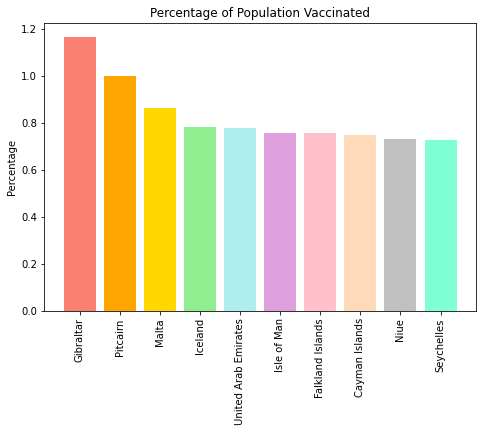

In [46]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(data_short.country,data_short.percent)
ax.set_ylabel('Percentage')
ax.set_title('Percentage of Population Vaccinated')
plt.xticks(rotation=90)
plt.bar(data_short.country, data_short.percent, color=['salmon', 'orange', 'gold', 'lightgreen', 'paleturquoise', "plum", "pink", "peachpuff", "silver", 'aquamarine'])
plt.show()


In [92]:
fig = px.choropleth(data_percent, locations="iso_code",
                   color="percent",
                   hover_name="country",
                   color_continuous_scale=px.colors.sequential.algae)
fig.show()

In [95]:
data.head()

,country,iso_code,date,daily_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,vaccines
21261,Norway,NOR,2020-12-02,NaN,0.0,0.0,NaN,"Moderna, Pfizer/BioNTech"
21262,Norway,NOR,2020-12-03,0.0,0.0,0.0,NaN,"Moderna, Pfizer/BioNTech"
21263,Norway,NOR,2020-12-04,0.0,0.0,0.0,NaN,"Moderna, Pfizer/BioNTech"
15647,Latvia,LVA,2020-12-04,NaN,1.0,0.0,NaN,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ..."
15648,Latvia,LVA,2020-12-05,0.0,2.0,0.0,NaN,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ..."


In [48]:
#data.sort_values("people_vaccinated_per_hundred")

data_total = data.sort_values(by="people_fully_vaccinated",ascending=False)
data_total.head(20)

,country,iso_code,date,daily_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,vaccines
5770,China,CHN,2021-06-10,17401857.0,622000000.0,43.21,223299000.0,"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S..."
30257,United States,USA,2021-07-17,524863.0,185765452.0,55.54,160994035.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
30256,United States,USA,2021-07-16,519678.0,185424899.0,55.44,160686378.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
30255,United States,USA,2021-07-15,529879.0,185135757.0,55.36,160408538.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
30254,United States,USA,2021-07-14,548045.0,184835149.0,55.27,160126516.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
30253,United States,USA,2021-07-13,532556.0,184543821.0,55.18,159675163.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
30252,United States,USA,2021-07-12,527353.0,184365333.0,55.13,159499224.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
30251,United States,USA,2021-07-11,506771.0,184132768.0,55.06,159266536.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
30250,United States,USA,2021-07-10,513550.0,183836917.0,54.97,158954417.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
30249,United States,USA,2021-07-09,593848.0,183542871.0,54.88,158629431.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech"


In [49]:
data_total.drop_duplicates(['iso_code'], keep='first', inplace=True)
data_total = data_total.sort_values(by="people_fully_vaccinated",ascending=False)
data_total

,country,iso_code,date,daily_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,vaccines
5770,China,CHN,2021-06-10,17401857.0,622000000.0,43.21,223299000.0,"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S..."
30257,United States,USA,2021-07-17,524863.0,185765452.0,55.54,160994035.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
12999,India,IND,2021-07-16,3883425.0,318665226.0,23.09,81030653.0,"Covaxin, Oxford/AstraZeneca, Sputnik V"
10663,Germany,DEU,2021-07-16,584144.0,49632810.0,59.24,38194316.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ..."
30047,United Kingdom,GBR,2021-07-16,231196.0,46227101.0,68.10,35732297.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech"
...,...,...,...,...,...,...,...,...
5303,Central African Republic,CAF,2021-05-12,NaN,667.0,0.01,NaN,"Covaxin, Oxford/AstraZeneca"
17061,Madagascar,MDG,2021-05-12,NaN,609.0,0.00,NaN,Oxford/AstraZeneca
30490,Vanuatu,VUT,2021-06-01,NaN,0.0,0.00,NaN,Oxford/AstraZeneca
22665,Pitcairn,PCN,2021-06-15,NaN,47.0,100.00,NaN,Oxford/AstraZeneca


In [50]:
data_total_short = data_total.head(10)
data_total_short

,country,iso_code,date,daily_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,vaccines
5770,China,CHN,2021-06-10,17401857.0,622000000.0,43.21,223299000.0,"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S..."
30257,United States,USA,2021-07-17,524863.0,185765452.0,55.54,160994035.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
12999,India,IND,2021-07-16,3883425.0,318665226.0,23.09,81030653.0,"Covaxin, Oxford/AstraZeneca, Sputnik V"
10663,Germany,DEU,2021-07-16,584144.0,49632810.0,59.24,38194316.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ..."
30047,United Kingdom,GBR,2021-07-16,231196.0,46227101.0,68.10,35732297.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech"
4119,Brazil,BRA,2021-07-17,1454070.0,93842534.0,44.15,33854929.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
8654,England,OWID_ENG,2021-07-16,189488.0,38776888.0,68.89,29911441.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech"
9939,France,FRA,2021-07-15,569193.0,36766279.0,54.42,27070389.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ..."
14259,Italy,ITA,2021-07-17,543392.0,36430397.0,60.25,25963073.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ..."
14538,Japan,JPN,2021-07-15,1051913.0,40949434.0,32.38,25765094.0,"Moderna, Pfizer/BioNTech"


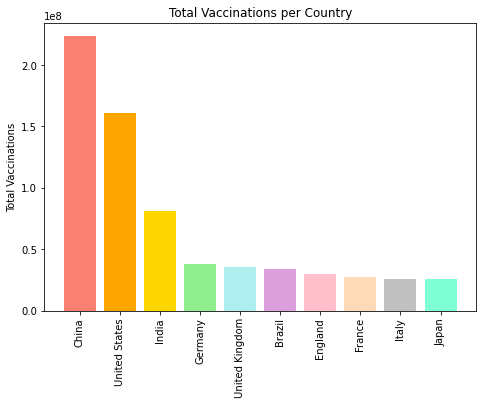

In [96]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(data_total_short.country,data_total_short.people_fully_vaccinated)
ax.set_ylabel('Total Vaccinations')
ax.set_title('Total Vaccinations per Country')
plt.xticks(rotation=90)
plt.bar(data_total_short.country,data_total_short.people_fully_vaccinated, color=['salmon', 'orange', 'gold', 'lightgreen', 'paleturquoise', "plum", "pink", "peachpuff", "silver", 'aquamarine'])
plt.show()


In [85]:
fig = px.choropleth(data_total, locations="iso_code",
                   color="people_fully_vaccinated",
                   hover_name="country",
                   color_continuous_scale=px.colors.sequential.Redor)
fig.show()